# Movie Ratings Lab

### Intro and objectives
#### Apply the concepts learned so far in a real use case

### In this lab you will learn:
1. Combine and merge large datasets
2. Transform dataframes

## What I hope you'll get out of this lab
* Gain experience processing real datasets
* Compute basic insigths from data given to you

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provides movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

### While we do not explore machine learning techniques in detail in this book, You will learn how to slice and dice datasets like these into the exact form you need.

### The MovieLens 1M dataset contains one million ratings collected from six thousand users on four thousand movies. It’s spread across three tables: ratings, user information, and movie information. These files contain 1,000,209 anonymous ratings of approximately 3,900 movies  made by 6,040 MovieLens users who joined MovieLens in 2000.


#### RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

#### USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

#### MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

In [2]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("https://raw.githubusercontent.com/thousandoaks/Python4DS102/main/data/users.txt", sep="::",header=None, names=unames)






/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("https://raw.githubusercontent.com/thousandoaks/Python4DS102/main/data/ratings.txt", sep="::",header=None, names=rnames)



In [4]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("https://raw.githubusercontent.com/thousandoaks/Python4DS102/main/data/movies.txt", sep="::",header=None, names=mnames)

In [5]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### Analyzing the data spread across three tables is not a simple task; for example, suppose you wanted to compute mean ratings for a particular movie by gender identity and age. As you will see, this is more convenient to do with all of the data merged together into a single table. Using pandas’s merge function, we first merge ratings with users and then merge that result with the movies data. pandas infers which columns to use as the merge (or join) keys based on overlapping names:

In [8]:
RatingsUsersDataFrame=pd.merge(ratings, users, on='user_id')

In [9]:
RatingsUsersDataFrame

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106
1000205,6040,1094,5,956704887,M,25,6,11106
1000206,6040,562,5,956704746,M,25,6,11106
1000207,6040,1096,4,956715648,M,25,6,11106


In [10]:
RatingsUsersDataFrameMovies=pd.merge(RatingsUsersDataFrame,movies, on='movie_id')

In [11]:
RatingsUsersDataFrameMovies

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


## Let's process the 'genres' column
### We want to extract the first attribute of the 'genres' column and store it as a new colunm called 'genres_main'

In [12]:
RatingsUsersDataFrameMovies.groupby('genres').count()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title
genres,,,,,,,,,
Action,12311,12311,12311,12311,12311,12311,12311,12311,12311
Action|Adventure,10446,10446,10446,10446,10446,10446,10446,10446,10446
Action|Adventure|Animation,345,345,345,345,345,345,345,345,345
Action|Adventure|Animation|Children's|Fantasy,135,135,135,135,135,135,135,135,135
Action|Adventure|Animation|Horror|Sci-Fi,618,618,618,618,618,618,618,618,618
...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller|War,280,280,280,280,280,280,280,280,280
Sci-Fi|War,1367,1367,1367,1367,1367,1367,1367,1367,1367
Thriller,17851,17851,17851,17851,17851,17851,17851,17851,17851


In [13]:
RatingsUsersDataFrameMovies['genres_main']=RatingsUsersDataFrameMovies['genres'].apply(lambda x:x.split('|')[0])

In [14]:
RatingsUsersDataFrameMovies

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,genres_main
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,Comedy


## Which genres are the most popular ?


### Let's get movie ratings by genre

In [15]:
MovieRatingsByGenre=RatingsUsersDataFrameMovies.groupby('genres')['rating'].mean()

In [16]:
MovieRatingsByGenre.sort_values(ascending=False).head(20)

genres
Animation|Comedy|Thriller             4.473837
Sci-Fi|War                            4.449890
Animation                             4.394336
Film-Noir|Mystery                     4.367424
Adventure|War                         4.346107
Film-Noir|Romance|Thriller            4.294382
Action|Adventure|Drama|Sci-Fi|War     4.292977
Film-Noir|Sci-Fi                      4.273333
Crime|Film-Noir                       4.264129
Film-Noir                             4.258105
Action|Adventure|Romance|War          4.251656
Adventure|Children's|Drama|Musical    4.247963
Drama|Film-Noir                       4.218153
Film-Noir|Thriller                    4.206757
Crime|Film-Noir|Mystery               4.202055
Comedy|Mystery|Romance|Thriller       4.184158
Comedy|Drama|Musical                  4.179785
Comedy|Mystery|Thriller               4.168155
Action|Adventure|Animation            4.147826
Comedy|Drama|Western                  4.141264
Name: rating, dtype: float64

### Let's get movie ratings by genre and gender

In [17]:
MovieRatingsByGenreAndGender=RatingsUsersDataFrameMovies.groupby(['genres','gender'])['rating'].mean()

In [18]:
MovieRatingsByGenreAndGender.sort_values(ascending=False).head(20)

genres                              gender
Animation|Comedy|Thriller           F         4.550802
Animation                           F         4.533333
Sci-Fi|War                          M         4.464789
Film-Noir|Romance|Thriller          F         4.448718
Animation|Comedy|Thriller           M         4.445110
Film-Noir|Mystery                   M         4.381536
Adventure|War                       M         4.376633
Sci-Fi|War                          F         4.376623
Adventure|Children's|Drama|Musical  F         4.355030
Animation                           M         4.353107
Action|Adventure|Drama|Sci-Fi|War   M         4.344577
Film-Noir                           F         4.339806
Action|Adventure|Romance|War        F         4.324232
Film-Noir|Mystery                   F         4.319444
Crime|Film-Noir                     M         4.316514
Film-Noir|Sci-Fi                    M         4.312500
Comedy|Mystery|Romance|Thriller     F         4.308901
Crime|Film-Noir|Myster

In [19]:
MovieRatingsByGenreAndGenderFlattenned=MovieRatingsByGenreAndGender.reset_index()

In [20]:
MovieRatingsByGenreAndGenderFlattenned

,genres,gender,rating
0,Action,F,3.367474
1,Action,M,3.352991
2,Action|Adventure,F,3.701213
3,Action|Adventure,M,3.671115
4,Action|Adventure|Animation,F,3.843750
...,...,...,...
596,Thriller,M,3.553364
597,War,F,3.841584
598,War,M,3.894382
599,Western,F,3.668613


In [21]:
MovieRatingsByGenreAndGenderFlattenned.sort_values(by='rating',ascending=False,inplace=True)

In [22]:
MovieRatingsByGenreAndGenderFlattenned.head(20)

,genres,gender,rating
310,Animation|Comedy|Thriller,F,4.550802
286,Animation,F,4.533333
594,Sci-Fi|War,M,4.464789
539,Film-Noir|Romance|Thriller,F,4.448718
311,Animation|Comedy|Thriller,M,4.445110
536,Film-Noir|Mystery,M,4.381536
283,Adventure|War,M,4.376633
593,Sci-Fi|War,F,4.376623
226,Adventure|Children's|Drama|Musical,F,4.355030
287,Animation,M,4.353107


### Do movie ratings depend on gender ?

Based on the following figure we don't observe significant differences in ratings

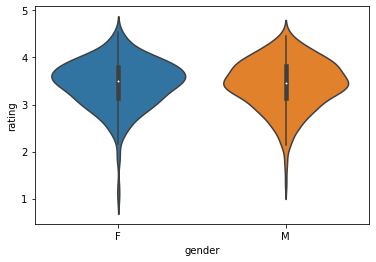

In [23]:
sns.violinplot(data=MovieRatingsByGenreAndGenderFlattenned, x='gender',y='rating')

## What are the most popular movies ?

In [24]:
RatingsUsersDataFrameMoviesByTitle=RatingsUsersDataFrameMovies.groupby('title')['rating'].mean()

In [25]:
RatingsUsersDataFrameMoviesByTitle.sort_values(ascending=False).head(20)

title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

## Long to Wide operations
#### Sometimes, for instance in Machine Learning contexts, DataFrames need to be transformed from long format to wide format.

#### We can use pandas.pivot() method for this.

In [26]:
RatingsUsersDataFrameMovies

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,genres_main
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,Comedy


### Let's create a Matrix displaying movies rated by users

In [27]:
RatingsUsersDataFrameMovies

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,genres_main
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,Comedy


In [28]:
pd.pivot_table(RatingsUsersDataFrameMovies, values='rating', index='movie_id',columns=['user_id'], aggfunc=np.mean)

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's create a Matrix displaying genres rated by users

In [29]:
pd.pivot_table(RatingsUsersDataFrameMovies, values='rating', index='user_id',columns=['genres_main'], aggfunc=np.mean)

genres_main,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.117647,4.333333,4.166667,4.000000,NaN,4.428571,NaN,NaN,NaN,4.000000,NaN,3.000000,NaN,4.000000,NaN,NaN
2,3.500000,4.000000,NaN,NaN,3.450000,3.666667,NaN,4.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.956522,4.333333,4.000000,NaN,3.625000,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,4.157895,NaN,NaN,4.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.612903,4.333333,4.000000,3.666667,3.354167,3.500000,3.666667,3.013514,NaN,5.000000,3.166667,NaN,3.000000,3.000000,4.000000,2.500000,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.000000,3.057143,4.032258,3.350000,3.151376,3.600000,3.666667,3.540230,3.0,4.333333,2.940000,3.375000,3.083333,3.333333,3.157895,3.304348,NaN,4.2
6037,3.642857,3.750000,4.000000,3.666667,3.584906,3.700000,NaN,3.888889,NaN,3.666667,4.000000,NaN,4.000000,5.000000,4.000000,3.266667,NaN,3.0
6038,3.000000,NaN,3.666667,3.000000,4.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
